## Movies and Streaming Site Analysis

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Import the movies and ott data sets
movies = pd.read_csv('movies.csv', index_col='ID')
ott = pd.read_excel('ott.xlsx', index_col='ID')

In [4]:
# Inspect the movie data and metadata
print(movies.info())
movies.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16744 entries, 1 to 16744
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            16744 non-null  object 
 1   Year             16744 non-null  int64  
 2   Age              7354 non-null   object 
 3   IMDb             16173 non-null  float64
 4   Rotten Tomatoes  5158 non-null   object 
 5   Directors        16018 non-null  object 
 6   Genres           16469 non-null  object 
 7   Country          16309 non-null  object 
 8   Language         16145 non-null  object 
 9   Runtime          16152 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 1.4+ MB
None


,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
ID,,,,,,,,,,
1,Inception,2010,13+,8.8,87%,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
2,The Matrix,1999,18+,8.7,87%,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
3,Avengers: Infinity War,2018,13+,8.5,84%,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
4,Back to the Future,1985,7+,8.5,96%,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [5]:
# Inspect the ott data and metadata
print(ott.info())
ott.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16744 entries, 1 to 16744
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Netflix      16744 non-null  int64
 1   Hulu         16744 non-null  int64
 2   Prime Video  16744 non-null  int64
 3   Disney+      16744 non-null  int64
dtypes: int64(4)
memory usage: 654.1 KB
None


,Netflix,Hulu,Prime Video,Disney+
ID,,,,
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,1,0,0,0
5,0,0,1,0


In [6]:
# Merge the movies and ott data sets into a new dataframe movies_ott
movies_ott = pd.merge(movies, ott, how='inner', on='ID')

# Preview the new dataframe
movies_ott.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
ID,,,,,,,,,,,,,,
1,Inception,2010,13+,8.8,87%,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,0,0,1,0
2,The Matrix,1999,18+,8.7,87%,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,0,1,0,0
3,Avengers: Infinity War,2018,13+,8.5,84%,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,0,0,1,0
4,Back to the Future,1985,7+,8.5,96%,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,1,0,0,0
5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,0,0,1,0


<AxesSubplot:xlabel='Age', ylabel='count'>

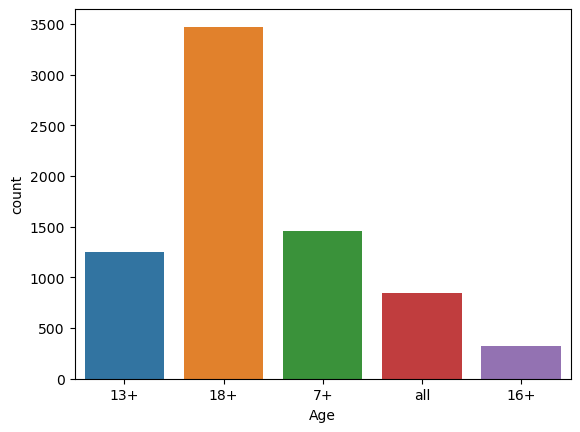

In [7]:
# Create a count plot of the number of movies streamed
# based on age rating
sns.countplot(x='Age', data=movies_ott)

<AxesSubplot:xlabel='Age', ylabel='count'>

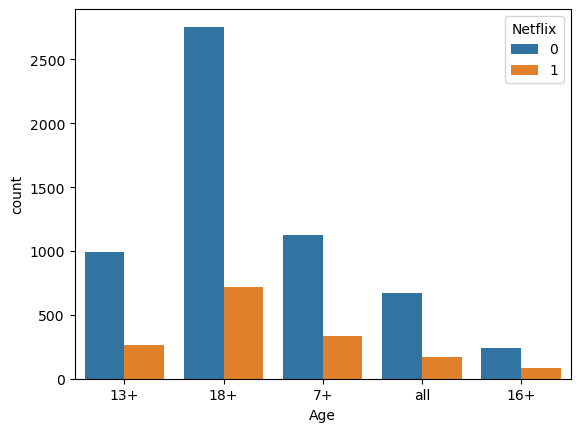

In [8]:
# Create a count plot of the number of movies streamed
# based on age rating
sns.countplot(x='Age', data=movies_ott, hue='Netflix')

From the countplots above, we can see that the majorit of streamed movies have an age rating of 18+. We can also see a similar pattern with the movies streamed on Netflix.

<AxesSubplot:xlabel='IMDb', ylabel='Count'>

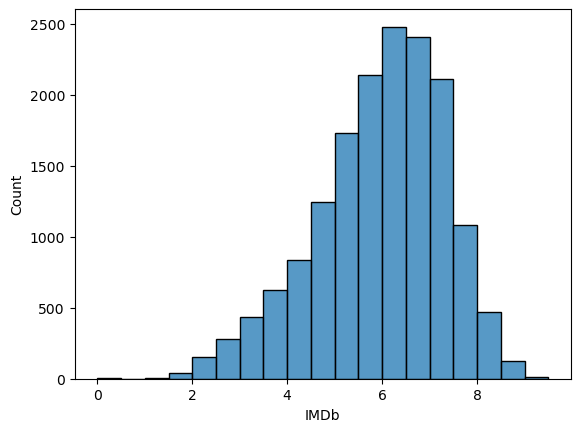

In [30]:
# Create histogram of IMDb ratings
sns.histplot(data=movies_ott, x='IMDb', binwidth=0.5)

The histogram above shows the distribution of IMDb ratings for movies. From the plot, we can see that it is negatively skewed, with the majority of films lying within a rating of 5 and 8. The histogram does not show values higher than 9 and at least one value which is 0 which are potentially outliers in the data.

In [43]:
# Remove the % symbol from the Rotten Tomatoes score
movies_ott['Rotten Tomatoes'] = movies_ott['Rotten Tomatoes'].str.replace('%', '')

ID
1         87
2         87
3         84
4         96
5         97
        ... 
16740    NaN
16741    NaN
16742    NaN
16743    NaN
16744    NaN
Name: Rotten Tomatoes, Length: 16744, dtype: object

In [56]:
# Drop NaN values from the Rotten Tomatoes column
movies_ott = movies_ott.dropna(subset=['Rotten Tomatoes'])

# View the new column
movies_ott['Rotten Tomatoes']

ID
1        87
2        87
3        84
4        96
5        97
         ..
16672    17
16678    13
16688     6
16706     7
16720    55
Name: Rotten Tomatoes, Length: 5158, dtype: int32

In [53]:
# Change Rotten Tomatoes data type from object to int64
movies_ott['Rotten Tomatoes'] = movies_ott['Rotten Tomatoes'].astype(int)

C:\Users\angus\AppData\Local\Temp\ipykernel_10796\2632775543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_ott['Rotten Tomatoes'] = movies_ott['Rotten Tomatoes'].astype(int)


[Text(0.5, 1.0, 'Rotten Tomatoes Score vs IMDb Rating')]

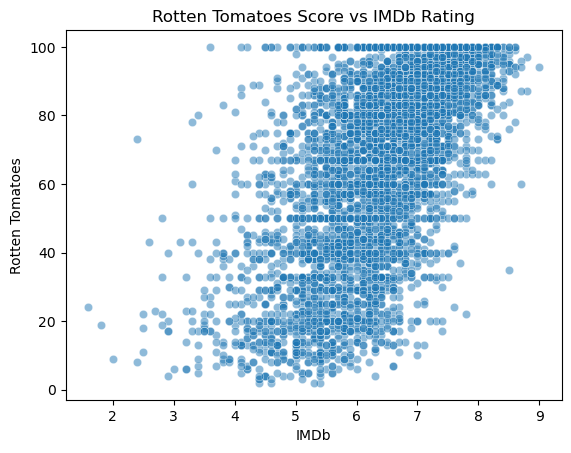

In [55]:
# Create scatterplot to show correlation between Rotten Tomatoes score and IMDb rating
sns.scatterplot(x='IMDb',
                y='Rotten Tomatoes',
                data=movies_ott,
                alpha=0.5)\
.set(title='Rotten Tomatoes Score vs IMDb Rating')

The scatterplot shows there is a positive correlation between the IMDb rating and Rotten Tomatoes score.

<AxesSubplot:xlabel='Age', ylabel='IMDb'>

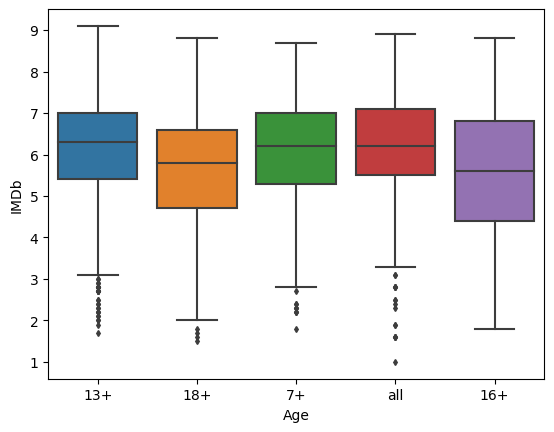

In [11]:
# Create a boxplot of IMDb ratings based on user age
sns.boxplot(x='Age',
            y='IMDb',
            data=movies_ott,
            fliersize=3)

We can see that every age group has outliers, which point towards very low IMDb ratings, with the exception of 16+. By reducing the fliersize, we can see that the concentration of outliers for the 13+ group is much higher.

<AxesSubplot:xlabel='Year', ylabel='IMDb'>

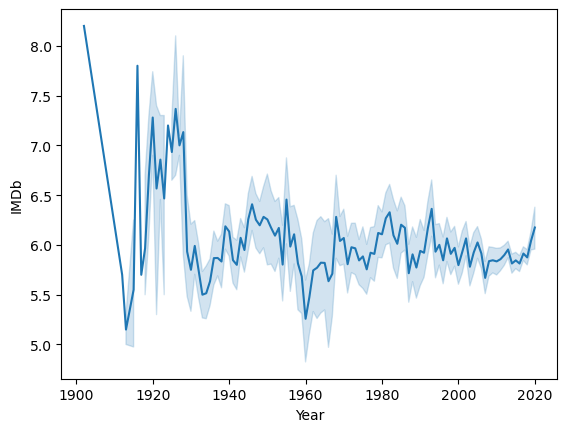

In [14]:
sns.lineplot(x='Year', y='IMDb', data=movies_ott)

A lineplot of the IMDb ratings of movies over time shows a downward trend. There is a spike in the ratings going into the 1920's, which plummits back down going into the 1940's. The ratings start to level out between the 1960's and 1980's.

<AxesSubplot:xlabel='Year', ylabel='IMDb'>

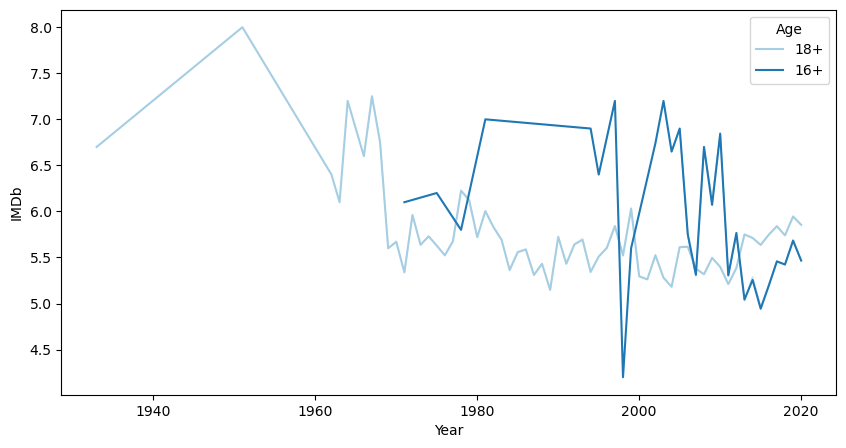

In [29]:
# Create two lineplots to show IMDb ratings and age ratings over time
plt.figure(figsize=(10, 5))

sns.lineplot(x='Year',
             y='IMDb',
             data=movies_ott[movies_ott['Age'].isin(['16+', '18+'])],
             hue='Age',
             palette='Paired',
             ci=False)

We can see a downward trend in the IMDb ratings for 18+ movies over time, which levels off towards the 2000's. We can also see the emeregence of 16+ movies around the 1970's, which varies intermittently. 16+ movies show a drop in ratings in the 2010's.